In [1]:
# import necessary packages
import yfinance as yf
import re
from datetime import date, timedelta
import pandas as pd
import matplotlib.pylab as plt
import requests
from scrapy import Selector
import warnings
warnings.filterwarnings('ignore')

# Collecting data

One crucial aspect for your analysis is to collect data you desire. Different options exist for this purpose in python, however, the majority of data access is based on APIs which stands for Application Programming Interface. Loosely speaking an API is a set of rules and protocols how to interact with other systems. For instance, a programmer which develops a restaurant app may want to include Google Maps services in her app to enable customers route searches to restaurants. She can achieve this by using the Google Maps API which allows her to include these functions in her app. Personally, I like to think about APIs as the menu in a restaurant. It enables me to name what I want to eat and the kitchen to tell me what is available and under which name I need to order it.

We are dominantly interested in data based APIs, where we do not use external applications or services, however, we want to access data which is provided by a data provider. The API tells us what how we can access the data on the server.

Before we take a look at the usage of APIs, we start with a python package which takes care of the API access in the background and, thus, is more user friendly (especially for beginners).

## Yahoo finance

[Yahoo finance](https://finance.yahoo.com/) is a web page which provides financial news, data, commentary and much more. It is addressed to retail traders and, thus, a popular source for individuals with interests in financial markets. Its data can be accessed with a cost free API and several python programmes did develop packages which enables easy to use access for it. One package which stands out as the most active and reliable, is the [yfinance](https://pypi.org/project/yfinance/). In order to access data for a company, one must need to know its ticker or symbol, respectively. This is an abbreviation under which a company's stocks are traded on stock exchanges. The easiest way to find the ticker, you go to https://finance.yahoo.com/ and search for the company by its name in the search bar. Once you start typing you will see the name of the company and its ticker to the left. If you follow the search, you will land at the company's site on yahoo finance and find the ticker in brackets next to the company name. To retrieve data with the yfinance package, initiate a `Ticker` instance with the ticker. Below, you can see all attributes and methods for this instance. While some or not fully implemented or may not work for every ticker, there are a lot of interesting and different data sources. Let us take a look at some examples.

In [2]:
ticker = yf.Ticker("AAPL")
attributes_and_methods = [name for name in dir(ticker) if not(re.match("_", name))]
attributes_and_methods

['actions',
 'analyst_price_targets',
 'balance_sheet',
 'balancesheet',
 'basic_info',
 'calendar',
 'capital_gains',
 'cash_flow',
 'cashflow',
 'dividends',
 'earnings',
 'earnings_dates',
 'earnings_estimate',
 'earnings_history',
 'eps_revisions',
 'eps_trend',
 'fast_info',
 'financials',
 'funds_data',
 'get_actions',
 'get_analyst_price_targets',
 'get_balance_sheet',
 'get_balancesheet',
 'get_calendar',
 'get_capital_gains',
 'get_cash_flow',
 'get_cashflow',
 'get_dividends',
 'get_earnings',
 'get_earnings_dates',
 'get_earnings_estimate',
 'get_earnings_history',
 'get_eps_revisions',
 'get_eps_trend',
 'get_fast_info',
 'get_financials',
 'get_funds_data',
 'get_growth_estimates',
 'get_history_metadata',
 'get_income_stmt',
 'get_incomestmt',
 'get_info',
 'get_insider_purchases',
 'get_insider_roster_holders',
 'get_insider_transactions',
 'get_institutional_holders',
 'get_isin',
 'get_major_holders',
 'get_mutualfund_holders',
 'get_news',
 'get_recommendations',
 'ge

Likely, the most popular choice, to fetch historical price data use the history method. Its most important arguments are:

* start: start date in yyyy-mm-dd or datetime format
* end: end date in yyyy-mm-dd or datetime format
* period: data period to download, can be used as an alternative to start and end 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
* interval: frequency of the data 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo

In [3]:
start_day = date.today() - timedelta(10)
ticker.history(start = start_day)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-04-14 00:00:00-04:00,211.440002,212.940002,201.160004,202.520004,101352900,0.0,0.0
2025-04-15 00:00:00-04:00,201.860001,203.509995,199.800003,202.139999,51343900,0.0,0.0
2025-04-16 00:00:00-04:00,198.360001,200.699997,192.369995,194.270004,59732400,0.0,0.0
2025-04-17 00:00:00-04:00,197.199997,198.830002,194.419998,196.979996,51334300,0.0,0.0
2025-04-21 00:00:00-04:00,193.270004,193.800003,189.809998,193.160004,46663300,0.0,0.0


To collect general information about the company. Note, this output is given in json format which we are going to discuss later in the course.

In [4]:
ticker.get_info()

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and p

To collect the most recent balance sheet information.

In [5]:
ticker.get_balance_sheet()

,2024-09-30,2023-09-30,2022-09-30,2021-09-30,2020-09-30
TreasurySharesNumber,NaN,0.0,NaN,NaN,NaN
OrdinarySharesNumber,15116786000.0,15550061000.0,15943425000.0,16426786000.0,NaN
ShareIssued,15116786000.0,15550061000.0,15943425000.0,16426786000.0,NaN
NetDebt,76686000000.0,81123000000.0,96423000000.0,89779000000.0,NaN
TotalDebt,106629000000.0,111088000000.0,132480000000.0,136522000000.0,NaN
...,...,...,...,...,...
CashCashEquivalentsAndShortTermInvestments,65171000000.0,61555000000.0,48304000000.0,62639000000.0,NaN
OtherShortTermInvestments,35228000000.0,31590000000.0,24658000000.0,27699000000.0,NaN
CashAndCashEquivalents,29943000000.0,29965000000.0,23646000000.0,34940000000.0,NaN
CashEquivalents,2744000000.0,1606000000.0,5100000000.0,17635000000.0,NaN


To collect the most recent financials.

In [6]:
ticker.get_financials()

,2024-09-30,2023-09-30,2022-09-30,2021-09-30,2020-09-30
TaxEffectOfUnusualItems,0.0,0.0,0.0,0.0,NaN
TaxRateForCalcs,0.241,0.147,0.162,0.133,NaN
NormalizedEBITDA,134661000000.0,125820000000.0,130541000000.0,123136000000.0,NaN
NetIncomeFromContinuingOperationNetMinorityInterest,93736000000.0,96995000000.0,99803000000.0,94680000000.0,NaN
ReconciledDepreciation,11445000000.0,11519000000.0,11104000000.0,11284000000.0,NaN
ReconciledCostOfRevenue,210352000000.0,214137000000.0,223546000000.0,212981000000.0,NaN
EBITDA,134661000000.0,125820000000.0,130541000000.0,123136000000.0,NaN
EBIT,123216000000.0,114301000000.0,119437000000.0,111852000000.0,NaN
NetInterestIncome,NaN,-183000000.0,-106000000.0,198000000.0,890000000.0
InterestExpense,NaN,3933000000.0,2931000000.0,2645000000.0,2873000000.0


To collect the most recent income statements.

In [7]:
ticker.get_income_stmt()

,2024-09-30,2023-09-30,2022-09-30,2021-09-30,2020-09-30
TaxEffectOfUnusualItems,0.0,0.0,0.0,0.0,NaN
TaxRateForCalcs,0.241,0.147,0.162,0.133,NaN
NormalizedEBITDA,134661000000.0,125820000000.0,130541000000.0,123136000000.0,NaN
NetIncomeFromContinuingOperationNetMinorityInterest,93736000000.0,96995000000.0,99803000000.0,94680000000.0,NaN
ReconciledDepreciation,11445000000.0,11519000000.0,11104000000.0,11284000000.0,NaN
ReconciledCostOfRevenue,210352000000.0,214137000000.0,223546000000.0,212981000000.0,NaN
EBITDA,134661000000.0,125820000000.0,130541000000.0,123136000000.0,NaN
EBIT,123216000000.0,114301000000.0,119437000000.0,111852000000.0,NaN
NetInterestIncome,NaN,-183000000.0,-106000000.0,198000000.0,890000000.0
InterestExpense,NaN,3933000000.0,2931000000.0,2645000000.0,2873000000.0


To collect some recent news.

In [8]:
ticker.get_news()

[{'id': 'debff5be-1170-4c2d-8dc9-e249fea79be3',
  'content': {'id': 'debff5be-1170-4c2d-8dc9-e249fea79be3',
   'contentType': 'STORY',
   'title': 'Chicken, crypto, and Nvidia: The companies that helped Trump’s inauguration shatter fundraising records',
   'description': '',
   'summary': 'A wide array of companies helped President Trump shatter fundraising records during his second inauguration, netting $239 million.',
   'pubDate': '2025-04-21T16:09:42Z',
   'displayTime': '2025-04-21T16:09:43Z',
   'isHosted': True,
   'bypassModal': False,
   'previewUrl': None,
   'thumbnail': {'originalUrl': 'https://s.yimg.com/os/creatr-uploaded-images/2025-04/0daa3150-1eca-11f0-baff-5cb796c95ca7',
    'originalWidth': 7378,
    'originalHeight': 4919,
    'caption': '',
    'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/olaYzgHnl6yVYHnSaw_ylA--~B/aD00OTE5O3c9NzM3ODthcHBpZD15dGFjaHlvbg--/https://s.yimg.com/os/creatr-uploaded-images/2025-04/0daa3150-1eca-11f0-baff-5cb796c95ca7',
     

To collect recommendations from stock market analysts.

In [9]:
ticker.get_recommendations()

,period,strongBuy,buy,hold,sell,strongSell
0,0m,7,23,16,1,1
1,-1m,7,21,14,2,1
2,-2m,7,21,13,2,2
3,-3m,8,21,13,2,2


To get information for the number or shares.

In [10]:
ticker.get_shares_full()

2023-10-27 00:00:00-04:00    15634199552
2023-10-28 00:00:00-04:00    15634199552
2023-11-03 00:00:00-04:00    15634199552
2023-11-04 00:00:00-04:00    15634199552
2023-11-09 00:00:00-05:00    15552799744
                                ...     
2025-04-11 00:00:00-04:00    15687100416
2025-04-12 00:00:00-04:00    15022100480
2025-04-16 00:00:00-04:00    15022100480
2025-04-17 00:00:00-04:00    15022100480
2025-04-22 00:00:00-04:00    15319199744
Length: 128, dtype: int64

And there are a few more. For instance, we can even retrieve options data. First you can get all expiration dates by.

In [11]:
expiration_dates = ticker.options
expiration_dates

('2025-04-25',
 '2025-05-02',
 '2025-05-09',
 '2025-05-16',
 '2025-05-23',
 '2025-05-30',
 '2025-06-20',
 '2025-07-18',
 '2025-08-15',
 '2025-09-19',
 '2025-10-17',
 '2025-12-19',
 '2026-01-16',
 '2026-03-20',
 '2026-06-18',
 '2026-12-18',
 '2027-01-15',
 '2027-06-17',
 '2027-12-17')

With the `option_chain` method, we can retrieve all options for an expiration date. Let us do this in a loop, to collect options for all expiration dates. Below you can see the most traded options at the time of writing.

In [12]:
calls, puts = [], []

for e_date in expiration_dates:
    options_date = ticker.option_chain(expiration_dates[0])
    puts_date = options_date.puts
    calls_date = options_date.calls
    puts_date.loc[:, "expiration"] = e_date
    calls_date.loc[:, "expiration"] = e_date
    calls.append(calls_date)
    puts.append(puts_date)

calls_df = pd.concat(calls)
puts_df = pd.concat(puts)

calls_df.loc[:, "type"] = "call"
puts_df.loc[:, "type"] = "put"
options_df = pd.concat((calls_df, puts_df))

# take a look at the most traded options by volume
options_df.sort_values(by = "volume", ascending = False).head(10)

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,expiration,type
46,AAPL250425C00200000,2025-04-21 19:59:59+00:00,200.0,1.51,0.0,0.0,0.0,0.0,32673.0,0,0.062509,False,REGULAR,USD,2025-09-19,call
46,AAPL250425C00200000,2025-04-21 19:59:59+00:00,200.0,1.51,0.0,0.0,0.0,0.0,32673.0,0,0.062509,False,REGULAR,USD,2025-05-30,call
46,AAPL250425C00200000,2025-04-21 19:59:59+00:00,200.0,1.51,0.0,0.0,0.0,0.0,32673.0,0,0.062509,False,REGULAR,USD,2027-12-17,call
46,AAPL250425C00200000,2025-04-21 19:59:59+00:00,200.0,1.51,0.0,0.0,0.0,0.0,32673.0,0,0.062509,False,REGULAR,USD,2026-01-16,call
46,AAPL250425C00200000,2025-04-21 19:59:59+00:00,200.0,1.51,0.0,0.0,0.0,0.0,32673.0,0,0.062509,False,REGULAR,USD,2025-05-02,call
46,AAPL250425C00200000,2025-04-21 19:59:59+00:00,200.0,1.51,0.0,0.0,0.0,0.0,32673.0,0,0.062509,False,REGULAR,USD,2025-12-19,call
46,AAPL250425C00200000,2025-04-21 19:59:59+00:00,200.0,1.51,0.0,0.0,0.0,0.0,32673.0,0,0.062509,False,REGULAR,USD,2026-06-18,call
46,AAPL250425C00200000,2025-04-21 19:59:59+00:00,200.0,1.51,0.0,0.0,0.0,0.0,32673.0,0,0.062509,False,REGULAR,USD,2025-05-09,call
46,AAPL250425C00200000,2025-04-21 19:59:59+00:00,200.0,1.51,0.0,0.0,0.0,0.0,32673.0,0,0.062509,False,REGULAR,USD,2026-03-20,call
46,AAPL250425C00200000,2025-04-21 19:59:59+00:00,200.0,1.51,0.0,0.0,0.0,0.0,32673.0,0,0.062509,False,REGULAR,USD,2025-10-17,call


Last but not least, it is also possible to download historical data for multiple tickers at once. This can be done by the `download` method of the package as demonstrated below.

In [13]:
df = yf.download(["AAPL", "MSFT"], period = "1y")
df.head()

[                       0%                       ]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


Price            Close                    High                     Low  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2024-04-22  165.060593  397.921997  166.473917  399.797691  163.995629   
2024-04-23  166.115616  404.481934  166.264920  405.107165  164.144925   
2024-04-24  168.225662  405.960632  168.504345  409.344799  165.428871   
2024-04-25  169.091583  396.016541  169.808201  396.860106  167.359755   
2024-04-26  168.504349  403.241425  170.534755  409.870805  168.384902   

Price                         Open                Volume            
Ticker            MSFT        AAPL        MSFT      AAPL      MSFT  
Date                                                                
2024-04-22  392.751481  164.742104  397.048660  48116400  20286900  
2024-04-23  400.006095  164.572913  401.177147  49537800  15734500  
2024-04-24  403.697909  165.757307  406.456844  48251800  15065300  
2024-04-25  385.089952  168.733275  391.044491  50558300  40586500  
2024-04-26  402.685670  169.081625  409.047107  44838400  29694700

You may have realized this already, yfinance uses pandas data frames, which makes it is for us to further process the data. E.g., determine the discrete returns of adjusted closing prices and scatter plot them. 

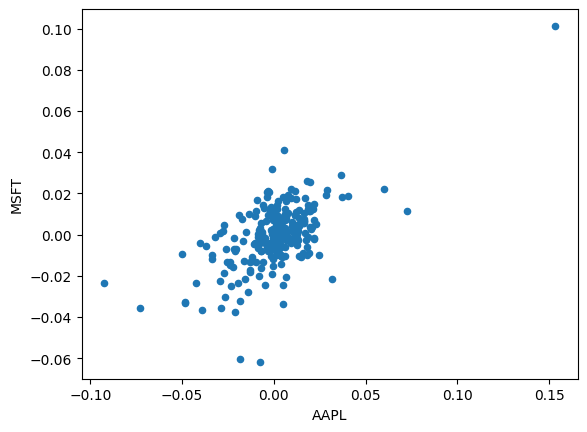

In [15]:
df.loc[:, "Close"].pct_change().dropna().plot.scatter(x = "AAPL", y = "MSFT")
plt.show()

While working with the yfinance package is simple and powerful, it also comes along with a few disadvantages. First of all, it is written by a nice person who is doing this voluntarily. Very likely, this is not the person's main job and if some changes occur which cause errors, it may take a while until the package is running again. Furthermore, yahoo finance excludes delisted companies from their web page. This means, no information can be found for stocks which are not listed on exchanges anymore. Try for yourself by, e.g. looking for Twitter. This causes problems from an academic perspective. One of the reasons for stocks getting delisted is that they go bankrupt or are bought by another companies. Often, this follows adverse company developments. By ignoring such companies in analysis, we introduce a bias towards more successful companies. Thus, results are more promising than they are in reality. This is also quite relevant if you compare different trading strategies so be careful!

## Working with APIs

For the majority of APIs, you will not find a pre-written package, so it is an asset to know how to access directly via an API. Normally, the procedure is to register an e-mail account to get an **identification key**. This key is needed to use the API from your computer and enables the provider to track your activity. For example, if only *n* downloads are free per day, too unrestrained a downloading business might even get you kicked or banned. In any case, to work properly with an API, one should read the documentary (or at least parts of it).

In general, we will use the [```requests```](https://requests.readthedocs.io/en/master/) package for working with APIs. With the requests package, we usually set send a request for a *get* response from the server, for example the data you asked for. In many cases, we retrieve the data in JSON format which stands for **J**ava**S**cript **O**bject **N**otation and is a type of data format which you will frequently encounter when working with online data. Its structure looks is very similar to a python dictionary, using curly and square brackets and key-value pairs as well as enabling nesting. Data is therefore stored in such objects. There are packages which can handle json files, for example pandas to transform it into a dataframe. 

### End of day historical data API

Let us take a look at the [eodhd](https://eodhd.com/) API as an example. Usually, we need to sign up, however, it also gives us a demo access without an individual API key. For instance, in their documentation, we can find instructions how to use the end of day API which is build to transfer stock price data. As shown [here](https://eodhd.com/financial-apis/api-for-historical-data-and-volumes/), you can extract data in json format by first sending a request with the `get` method to the API. 

You can see that the API is addressed as an URL which stands for **U**niform **R**esource **L**ocator and is the address your request is telling the server to look for information. It consists of several elements:

- the protocol: usually ```http``` or ```https``` in the www, followed by a colon and doube slash ```://```

- the hostname: ```eodhd.com``` 

- a path/query: appended with ```/``` or ```?``` to the hostname

In case of the API, `https://eodhd.com/api/eod/` is the endpoint which is the same for all companies and funds. MCD.US is the ticker with the market, so here, MCD for McDonald's and US for United States. What follows after the question mark are further arguments. The api_token would be your user specific key, fmt is the format argument. All arguments as well as the endpoint definition are API specific and must be studied in corresponding documentations before usage. As json format can be transformed to pandas dataframes, it gets quite simple after a successful request. See the example below.

Eodhd provides more endpoints with different financial data. In comparison to yahoo finance, it also includes historical data for delisted companies. However, it is not free and you must get register first. You can use a few endpoints up to certain request limits per day for free. Information can be found [here](https://eodhd.com/pricing)

In [16]:
url = f'https://eodhd.com/api/eod/MCD.US?api_token=demo&fmt=json'
data = requests.get(url).json()
df = pd.DataFrame(data)
df.tail()

,date,open,high,low,close,adjusted_close,volume
11362,2025-04-14,312.43,318.20,311.13,316.07,316.07,4068300
11363,2025-04-15,316.13,317.20,311.84,312.48,312.48,2901200
11364,2025-04-16,313.57,314.29,307.37,309.10,309.10,3098900
11365,2025-04-17,309.22,312.99,307.13,311.30,311.30,2726900
11366,2025-04-21,311.00,311.28,305.12,308.72,308.72,2668300


### EDGAR API

Another interesting API for the US the market is the EDGAR API which is provided by the Securities and Exchange Commission (SEC). The SEC uses Central Index Keys (CIK) to identify companies. According to US stock market regulations, companies must submit to the SEC which is collected in the EDGAR database and can be accessed via an API. The only thing you need to present is a user header as demonstrated below. A good place to start to inform yourself about the rules of the API is given [here](https://www.sec.gov/edgar/sec-api-documentation). The CIKs can be searched on their web page under the Filing -> Company Filings search. For instance Apple's CIK is 0000320193. Let us take a look at all submitted filings by Apple.

In [17]:
headers = {"User-Agent": "student@uni-passau.de"}
cik = "0000320193"
url = f"https://data.sec.gov/submissions/CIK{cik}.json"
r = requests.get(url, headers = headers)
filings = pd.DataFrame(r.json()['filings']['recent'])
filings.head()

,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,items,core_type,size,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription
0,0000320193-25-000049,2025-04-17,2025-04-15,2025-04-17T22:32:02.000Z,,4,,,,4,13415,0,0,xslF345X05/wk-form4_1744929115.xml,FORM 4
1,0000320193-25-000048,2025-04-17,2025-04-15,2025-04-17T22:31:13.000Z,,4,,,,4,16183,0,0,xslF345X05/wk-form4_1744929066.xml,FORM 4
2,0001140361-25-012359,2025-04-04,,2025-04-04T20:30:11.000Z,34,SD,001-36743,25815163,,SD,221487,0,0,ef20046400_sd.htm,SD
3,0000320193-25-000045,2025-04-03,2025-04-01,2025-04-03T22:33:37.000Z,,4,,,,4,19563,0,0,xslF345X05/wk-form4_1743719610.xml,FORM 4
4,0000320193-25-000044,2025-04-03,2025-04-01,2025-04-03T22:32:58.000Z,,4,,,,4,13553,0,0,xslF345X05/wk-form4_1743719572.xml,FORM 4


This is an overview of different filings. The type of filings can be determined by the form. Very interesting filings are, e.g., filings of form 10-Q (quarter reports), form 10-K (annual reports) or form 8-K which is information that must be disclosed to the public if it can have a potential impact on the company. Each filing can be uniquely identified by its accession number (and primary document key). The content of each document can be found by the combination of an url and these identifiers. For instance let us get the link to the most recent annual report. 

In [18]:
most_recent_10k = filings[filings.form.isin(["10-K", "10-K/A"])].iloc[0, :]
most_recent_10k

accessionNumber              0000320193-24-000123
filingDate                             2024-11-01
reportDate                             2024-09-28
acceptanceDateTime       2024-11-01T10:01:36.000Z
act                                            34
form                                         10-K
fileNumber                              001-36743
filmNumber                              241416806
items                                            
core_type                                    XBRL
size                                      9759333
isXBRL                                          1
isInlineXBRL                                    1
primaryDocument                 aapl-20240928.htm
primaryDocDescription                        10-K
Name: 43, dtype: object

In [19]:
tenk_url = f"https://www.sec.gov/Archives/edgar/data/{cik}/{most_recent_10k.accessionNumber.replace('-', '')}/{most_recent_10k.primaryDocument}"
tenk_url

'https://www.sec.gov/Archives/edgar/data/0000320193/000032019324000123/aapl-20240928.htm'

This is another URL which contains the information of the full report, we can also request its data.

In [20]:
r = requests.get(tenk_url, headers = headers)
r.content[5000:6000]

b'"us-gaap:FinanceLeaseLiabilityCurrentStatementOfFinancialPositionExtensibleList" id="f-863">http://fasb.org/us-gaap/2024#OtherLiabilitiesCurrent</ix:nonNumeric><ix:nonNumeric contextRef="c-21" name="us-gaap:FinanceLeaseLiabilityNoncurrentStatementOfFinancialPositionExtensibleList" id="f-866">http://fasb.org/us-gaap/2024#OtherLiabilitiesNoncurrent</ix:nonNumeric><ix:nonNumeric contextRef="c-22" name="us-gaap:FinanceLeaseLiabilityNoncurrentStatementOfFinancialPositionExtensibleList" id="f-867">http://fasb.org/us-gaap/2024#OtherLiabilitiesNoncurrent</ix:nonNumeric><ix:nonNumeric contextRef="c-189" name="ecd:TrdArrDuration" id="f-1124">P856D</ix:nonNumeric><ix:nonNumeric contextRef="c-192" name="ecd:TrdArrDuration" id="f-1125">P473D</ix:nonNumeric></ix:hidden><ix:references xml:lang="en-US"><link:schemaRef xlink:type="simple" xlink:href="aapl-20240928.xsd"/></ix:references><ix:resources><xbrli:unit id="usd"><xbrli:measure>iso4217:USD</xbrli:measure></xbrli:unit><xbrli:unit id="shares"><x

The output if this request is the content of the URL which is not part of the EDGAR API. If we want to extract its content we need other techniques which are collected under the term *Scraping*. Before we do so, let me share some more information for the EDGAR API. If you read carefully through the documentation on their web page, you can find a lot of information what the different forms represent and which data can be collected by it. For some APIs it is offered to download bulk data which is favorable for larger data retrieval. While filings contain mostly textual information, financial data which follows certain accounting standards and which are demanded by the SEC can also be found. A good example is given by the companyfacts API or its bulk data. Feel free to examine these different sources. 

## Scraping

To collect data and information from web pages, we first need to learn basic concepts how content is stored. The first is the **H**yper**T**ext **M**arkup **L**anguage for web browsers. HTML uses **tags** to structure hierarchical data, telling the browser how to display the single elements. Tags appear in pairs and are enclosed in angle brackets ```<tag>``` to open a respective section and ```</tag>``` to close it.\
Any HTML will be enclosed in the most outer ```<html>``` and ```</html>``` tags. Inside this, the document is structured by various tags. To name just some: 

- ```<body>```: the main part of a website containing the displayed information

- ```<div>```: division, denotes a section

- ```<p>```: paragraph, simple text information

- ```<table>```: displays data in a table, (```<tr>``` for single rows)

- ```<b>```: bold, does not structure the page, but alters the font 

Beside the tag itself attributes may be included inside the brackets. With the right tools, we can exploit tags and attributes to navigate to specific elements on webpages in order to extract the element information. Very common attributes are ```id``` and ```class```. 

A simple html may look like this (inside """ and indented):

In [21]:
"""
<html>
  <body>
    <div id='div_1'>
      <p class='section' id ='intro'>
        This is a brief introduction to <b>HTML</b>.
      </p>
    </div>
  </body>
</html>
"""

"\n<html>\n  <body>\n    <div id='div_1'>\n      <p class='section' id ='intro'>\n        This is a brief introduction to <b>HTML</b>.\n      </p>\n    </div>\n  </body>\n</html>\n"

Related to HTML is **E**xtensible **M**arkup **L**anguage **XML** which provides something like a framework to markup languages to encode structured, hierarchical data for transfer. In comparison to HTML it is less for displaying data than storing and transferring it. While the differences are not of interest here (learn about them yourself anytime, though), the similarities are: in the way, we can use them to navigate html documents. 

The **XML Path Language** (**Xpath**) allows to select items from an xml document by addressing tag names, attributes and structural characteristics. We can use the respective commands to retrieve elements from html documents, i.e. websites.

The two basic operators are

- a forward slash ```/```: to look into the next generation

- square brackets ```[]```: select a specific element

The forward slash works basically the same way as in an URL or path when navigating a directory on your computer. The square brackets on the other hand have a very similar functionality to the usage of square brackets in python.

Lets have a look at a slightly extended version of the html document from above to see how we can use these operators for navigation.

As usual, different python packages in python exist for navigating through xml documents and extract the desired content. One example is the [Scrapy](https://scrapy.org/) package with its `Selector` module which we are going to use. As an alternative you may want to examine the [Beautiful Soup](https://beautiful-soup-4.readthedocs.io/en/latest/) package.

In [22]:
my_html = \
"""<html><body><div id='div_1'><p class='parag-1' id ='intro'>This is a brief introduction to <b>HTML</b>.</p>
<p class='parag-1-1' id ='main'>Part 2.</p></div id='div_2' href='www.uni-passau.de'>
<p class='parag-2' id ='outro'>Part 3. <a href='www.uni-passau.de'>Homepage</a></p></body></html>
"""

#formatted version to better visualise the structure

# <html>
#   <body>
#     <div id='div_1'>
#       <p class='parag-1' id ='intro'>
#         This is a brief introduction to <b>HTML</b>.
#       </p>
#       <p class='parag-1-1' id ='main'>
#         Part 2.
#       </p>
#     </div id='div_2' >
#     <p class='parag-2' id ='outro'>
#         Part 3.
#         <a href='www.uni-passau.de'>Homepage</a>
#     </p>
#   </body>
# </html>

Because of the tree like structure elements are labeled in on the basis of a family tree. The html consists of the **body** inside the **html** tags. In the next generation, called *child generation*, we see one **div** element, itself containing two **p** elements, i.e. *children*. Another **p** element appears as a *sibling* to the only **div** element.

Now let's select single elements from this html using the ```xpath()``` method to which we pass our statement as string. To do so, we must first instantiate an Selector object with ```my_html```. Note that chaining the ```extract()``` method to the selector object gives the desired result.

In [23]:
sel = Selector(text=my_html)

# navigate to p elements inside div
print('both p elements:\n', sel.xpath('/html/body/div/p').extract())

both p elements:
 ['<p class="parag-1" id="intro">This is a brief introduction to <b>HTML</b>.</p>', '<p class="parag-1-1" id="main">Part 2.</p>']


In the special case here, where all child elements are the *p* elements we are looking for, we can use the wildcard character ```*```. It wil select any element, no matter the tag in the next generation (or in all future generations with a double forward slash).

In [24]:
# use wildcard character *
print('\nwildcard *:\n', sel.xpath('/html/body/div/*').extract())


wildcard *:
 ['<p class="parag-1" id="intro">This is a brief introduction to <b>HTML</b>.</p>', '<p class="parag-1-1" id="main">Part 2.</p>']


To select only the first *p* element, index the result with square brackets. 

:::{admonition}Caution
:class: caution
Xpath indexing starts with 1 and not 0 like python does!:::

Another way is to use scrapy's ```extract_first()``` method.

In [25]:
# select first p with [1]
print('slelect only first p\n',sel.xpath('/html/body/div/p[1]').extract())

# indexing the python list starts with 0!
print('\nslelect only first p\n',sel.xpath('/html/body/div/p').extract()[0])

# with extract_first()
print('\nslelect only first p\n',sel.xpath('/html/body/div/p').extract_first())

slelect only first p
 ['<p class="parag-1" id="intro">This is a brief introduction to <b>HTML</b>.</p>']

slelect only first p
 <p class="parag-1" id="intro">This is a brief introduction to <b>HTML</b>.</p>

slelect only first p
 <p class="parag-1" id="intro">This is a brief introduction to <b>HTML</b>.</p>


We see, that a forward slash navigates one generation deeper into the structure, from *html* over *body* and *div* to both(!) *p* elements. Here, we get back a list (first print statement) of the *p* elements, where we can intuitively use the square brackets to select only the first one. What we get back, however, is still a *selector object*. To extract the text only, we need to modify the statement further by ```/text()```.

In [26]:
# select text from first p element
to_print = sel.xpath('/html/body/div/p[1]/text()').extract()

print('text in first p:\n',to_print)

text in first p:
 ['This is a brief introduction to ', '.']


Now again, we do not see all of the text, just the string before the *b* tags and the dot after it as elements of a list. Even though the *b* tags for bold printing appear in-line, they still define a child generation for the enclosed 'HTML' string. Here, we could navigate further down the tree using a path to the b element for example. Instead, we will make use of the double forward slash ```//```, which selects everything '**from future generations**'. Meaning it will select all the text from all generations that follow this first *p* element. 

In [27]:
# select text from first p element and all future generations by a double forward slash
to_print = sel.xpath('/html/body/div/p[1]//text()').extract()
print('text in first p and future generations with double slash:\n',to_print)

# for one string, use the join() function
print('\ncomplete string:\n', ''.join(to_print))

text in first p and future generations with double slash:
 ['This is a brief introduction to ', 'HTML', '.']

complete string:
 This is a brief introduction to HTML.


Beside specifying a path explicitly, we can leverage built-in methods to extract our desired elements. Scrapy's ```getall()``` returns all elements of a given tag as list.

In [28]:
print('scrapy:\n', sel.xpath('//p').getall())

scrapy:
 ['<p class="parag-1" id="intro">This is a brief introduction to <b>HTML</b>.</p>', '<p class="parag-1-1" id="main">Part 2.</p>', '<p class="parag-2" id="outro">Part 3. <a href="www.uni-passau.de">Homepage</a></p>']


As mentioned before, elements can be addressed using attributes, like ID or class name. The attribute is addressed in square brackets, with ```@attr = 'attr_name'```. If the same attribute applies to several tags, a list of all results is returned.

In [29]:
# search all elements in document (leading //*) by id
print('ID with wildcard:\n', sel.xpath('//*[@id="div_1"]').extract())

# same as (tag must be known)
print('\nID with div:\n', sel.xpath('//div[@id="div_1"]').extract())

ID with wildcard:
 ['<div id="div_1"><p class="parag-1" id="intro">This is a brief introduction to <b>HTML</b>.</p>\n<p class="parag-1-1" id="main">Part 2.</p></div>']

ID with div:
 ['<div id="div_1"><p class="parag-1" id="intro">This is a brief introduction to <b>HTML</b>.</p>\n<p class="parag-1-1" id="main">Part 2.</p></div>']


The ```contains``` function provides access to attributes based on (parts of) the attribute name.

In [30]:
# find all elements where attr contains string
print('contains string:\n', sel.xpath('//*[contains(@class, "parag-1")]').extract())

contains string:
 ['<p class="parag-1" id="intro">This is a brief introduction to <b>HTML</b>.</p>', '<p class="parag-1-1" id="main">Part 2.</p>']


Finally, an attribute can be returned by addressing it in the path.

In [31]:
print('get attribute:\n', sel.xpath('/html/body/div/p[1]/@id').extract())

get attribute:
 ['intro']


The **C**ascading **S**tyle **S**heets language is another way to work with markup languages and thus html. Of special interest for us is that it also provides selectors. Even more convenient is that scrapy includes these selectors and the respective language. CSS uses a different syntax, which can offer much simpler and shorter statements for the same element than xpath (or sometime, the opposite) 

The basic syntax changes from xpath like this:
- a single generation forward: ```/``` is replaced by ```>```

- all future generations: ```//``` is replaced by a blank space (!)

- not so short anymore: indexing with ```[k]``` becomes ```:nth-of-type(k)```

For scrapy, nothing changes really, except using ```.css()``` method. The selector object is the same as before.\
Some examples: 

In [32]:
# navigate to p elements inside div
print('xpath:\n', sel.xpath('/html/body/div/p').extract())
print('\ncss:\n', sel.css('html>body>div>p').extract())

# navigate to all p elements in document
print('\nall p elements')
print('xpath:\n', sel.xpath('//p').extract())
print('\ncss:\n', sel.css('p').extract())

xpath:
 ['<p class="parag-1" id="intro">This is a brief introduction to <b>HTML</b>.</p>', '<p class="parag-1-1" id="main">Part 2.</p>']

css:
 ['<p class="parag-1" id="intro">This is a brief introduction to <b>HTML</b>.</p>', '<p class="parag-1-1" id="main">Part 2.</p>']

all p elements
xpath:
 ['<p class="parag-1" id="intro">This is a brief introduction to <b>HTML</b>.</p>', '<p class="parag-1-1" id="main">Part 2.</p>', '<p class="parag-2" id="outro">Part 3. <a href="www.uni-passau.de">Homepage</a></p>']

css:
 ['<p class="parag-1" id="intro">This is a brief introduction to <b>HTML</b>.</p>', '<p class="parag-1-1" id="main">Part 2.</p>', '<p class="parag-2" id="outro">Part 3. <a href="www.uni-passau.de">Homepage</a></p>']


The css locator provides short notation when working with *id* or *class*:
- to select elements by class: use ```tag.class-name``` (similiar to method chaining)

- to select elements by id: use ```tag#id-name```

Examples from the toy html above:

In [33]:
# select by id
print('select by class:\n', sel.css('*.parag-1').extract())

# select by id
print('\nselect by id:\n', sel.css('*#intro').extract())

select by class:
 ['<p class="parag-1" id="intro">This is a brief introduction to <b>HTML</b>.</p>']

select by id:
 ['<p class="parag-1" id="intro">This is a brief introduction to <b>HTML</b>.</p>']


Attributes are in general addressed by a double colon ```::attr(attribute-name)```, for example to extract a link from the ```href``` attribute:

In [34]:
# select by attribute
print('\nselect by attribute:\n', sel.css('*::attr(href)').extract())


select by attribute:
 ['www.uni-passau.de']


The double colon is also used to extract ```::text```, like we used ```/text()``` in xpath:

In [35]:
# extract all (blank space!) text descending from p elements inside div elements with class 'div_1' 
print('\nextract text:\n', sel.css('div#div_1>p ::text').extract())


extract text:
 ['This is a brief introduction to ', 'HTML', '.', 'Part 2.']


Look for exampe at [this cheatsheet](https://devhints.io/xpath) for more commands with xpath and css. Common internet browsers like firefox, chrome, safari, etc. include functionality to inspect webpages, meaning to look at the underlying html. To view the html, right-click on a specific element on the webpage, e.g. a headline, and select "Inspect Element" (or something similar), like shown in this screenshot below.

![title](graphics/search_html.png)

We are going to practice this a little in the tutorials. If you need to scrape data from dynamic web pages you can look for the [Selenium](https://selenium-python.readthedocs.io/) package. Furthermore, sometimes you may want to extract data from multiple web pages for which you may want to look into the web crawler documentation of the scrapy package. 